## Observations and Insights 

In [291]:
# Dependencies and Setup
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousedata_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice.
unique_df = combined_mousedata_df['Mouse ID'].value_counts()
unique_df


g989    13
p189    10
q787    10
s710    10
q633    10
        ..
n482     1
x226     1
t573     1
f932     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [68]:
ids = combined_mousedata_df["Mouse ID"]

In [69]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateMiceDF = combined_mousedata_df[combined_mousedata_df.duplicated(["Mouse ID", "Timepoint"])]
duplicateMiceDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [70]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_df = combined_mousedata_df.loc[combined_mousedata_df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
combined_mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_mousedata_df = combined_mousedata_df.loc[(combined_mousedata_df["Mouse ID"] != "g989")]
combined_mousedata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
combined_mousedata_copy_df = combined_mousedata_df

In [75]:
unique_df = combined_mousedata_df['Mouse ID'].value_counts()
unique_df

z969    10
g791    10
c302    10
x581    10
u196    10
        ..
u153     1
n482     1
o848     1
b447     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [76]:
regimen_df = combined_mousedata_df['Drug Regimen'].value_counts()
regimen_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
#each regimen

# This method produces everything in a single groupby function


In [77]:
mean_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean().reset_index()
mean_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565


In [78]:
median_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median().reset_index()
median_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285


In [79]:
variance_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var().reset_index()
variance_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [80]:
sd_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std().reset_index()
sd_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708


In [81]:
SEM_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem().reset_index()
SEM_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [82]:
volume_pd = pd.merge((pd.merge(mean_volume, median_volume, how='inner', on='Drug Regimen')), variance_volume, how='inner', on='Drug Regimen')
volume_pd.head()

,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479


In [83]:
volume2_pd = pd.merge(sd_volume, SEM_volume, how='inner', on='Drug Regimen')

volume2_pd.head()

,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,4.994774,0.329346
1,Ceftamin,6.268188,0.469821
2,Infubinol,6.567243,0.492236
3,Ketapril,8.279709,0.603860
4,Naftisol,8.134708,0.596466


In [84]:
finalMerge_pd = pd.merge(volume_pd, volume2_pd, how='inner', on='Drug Regimen')
finalMerge_pd

,Drug Regimen,Tumor Volume (mm3)_x_x,Tumor Volume (mm3)_y_x,Tumor Volume (mm3),Tumor Volume (mm3)_x_y,Tumor Volume (mm3)_y_y
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [85]:
finalMerge_pd = finalMerge_pd.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y_x": "Median Tumor Volume", "Tumor Volume (mm3)": "Tumor Volume Variance", "Tumor Volume (mm3)_x_y": "Tumor Volume Std. Dev.", "Tumor Volume (mm3)_y_y": "Tumor Volume Std. Err."})
finalMerge_pd.head()

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [117]:
Mouse_volume = combined_mousedata_df.groupby(["Drug Regimen"])['Mouse ID'].count().reset_index()
Mouse_volume = Mouse_volume.rename(columns={"Mouse ID": "Data Points"})
Mouse_volume = Mouse_volume.sort_values(by=["Data Points"], ascending=False)
Mouse_volume


,Drug Regimen,Data Points
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,161


In [122]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
#using pandas.
x_axis = np.arange(len(Mouse_volume))
tick_locations = [value for value in x_axis]

Text(0, 0.5, 'Number of Data Points')

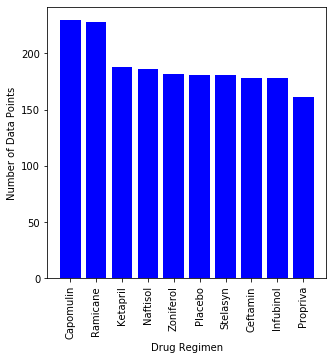

In [130]:
plt.figure(figsize=(5,5))
plt.bar(x_axis, Mouse_volume["Data Points"], color='b', alpha= 1, align="center")
plt.xticks(tick_locations, Mouse_volume["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

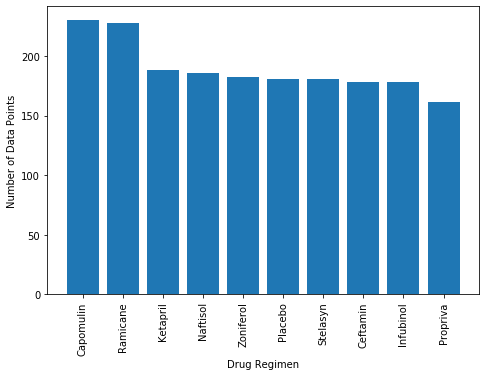

In [140]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
#using pyplot.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
Data = Mouse_volume["Data Points"]
ax.bar(Drugs,Data)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [161]:
Gender_total = combined_mousedata_df.groupby(["Sex"])['Mouse ID'].count().reset_index()
Gender_total = Gender_total.rename(columns={"Mouse ID": "Total"})
Gender_total

,Sex,Total
0,Female,935
1,Male,958


In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = Gender_total["Sex"]
sizes = Gender_total["Total"]
colors = ["orange", "blue"]
explode = (0.0, 0.0)

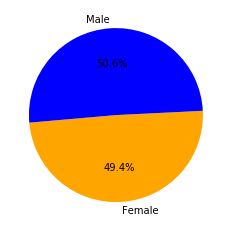

In [167]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=185)
plt.show()

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
totals = [958, 935]
colors = ["blue", "orange"]
explode = (0.0, 0.0)

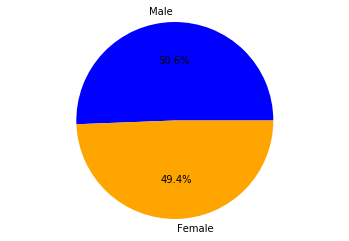

In [176]:
plt.pie(totals, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumorVolumeDF = combined_mousedata_df[combined_mousedata_df.duplicated(["Mouse ID"])]
duplicateMiceDF


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [180]:
tumorVolumeDF = tumorVolumeDF.sort_values(by=["Timepoint"], ascending=False)

In [181]:
tumorVolumeDF = combined_mousedata_df.drop_duplicates(subset="Mouse ID", keep='last', inplace=False, ignore_index=False)
tumorVolumeDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [185]:
#Capomulin
Capomulin_volume = tumorVolumeDF.loc[(tumorVolumeDF["Drug Regimen"] == "Capomulin")]
Capomulin_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [212]:
Cap_quartiles = Capomulin_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

In [218]:
print(f"The lower quartile of Capomulin tumor volume is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {Cap_upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {Cap_iqr}")
print(f"The the median of Capomulin tumor volume is: {Cap_quartiles[0.5]} ")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 


In [186]:
#Ramicane
Ramicane_volume = tumorVolumeDF.loc[(tumorVolumeDF["Drug Regimen"] == "Ramicane")]
Ramicane_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [214]:
Ram_quartiles = Ramicane_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq


In [219]:
print(f"The lower quartile of Ramicane tumor volume is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {Ram_upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {Ram_iqr}")
print(f"The the median of Ramicane tumor volume is: {Ram_quartiles[0.5]} ")

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 


In [187]:
#Infubinol
Infubinol_volume = tumorVolumeDF.loc[(tumorVolumeDF["Drug Regimen"] == "Infubinol")]
Infubinol_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
530,a577,Infubinol,Female,6,25,30,57.031862,2
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [216]:
Inf_quartiles = Infubinol_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Inf_lowerq = quartiles[0.25]
Inf_upperq = quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq


In [230]:
print(f"The lower quartile of Infubinol tumor volume is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {Inf_upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {Inf_iqr}")
print(f"The the median of Infubinol tumor volume is: {Inf_quartiles[0.5]} ")


The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 


In [188]:
#Ceftamin
Ceftamin_volume = tumorVolumeDF.loc[(tumorVolumeDF["Drug Regimen"] == "Ceftamin")]
Ceftamin_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
594,b447,Ceftamin,Male,2,30,0,45.000000,0
600,b487,Ceftamin,Female,6,28,25,56.057749,1
617,b759,Ceftamin,Female,12,25,30,55.742829,1
840,f436,Ceftamin,Female,3,25,15,48.722078,2


In [225]:
Cef_quartiles = Ceftamin_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Cef_lowerq = quartiles[0.25]
Cef_upperq = quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

In [226]:
print(f"The lower quartile of Ceftamin tumor volume is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {Cef_iqr}")
print(f"The the median of Ceftamin tumor volume is: {Cef_quartiles[0.5]} ")

The lower quartile of Ceftamin tumor volume is: 54.04860769
The upper quartile of Ceftamin tumor volume is: 65.52574285
The interquartile range of Ceftamin tumor volume is: 11.477135160000003
The the median of Ceftamin tumor volume is: 59.85195552 


In [233]:
Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)
Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)

print(f"Capomulin's potential outliers: {Cap_lower_bound} {Cap_upper_bound}")
print(f"Ramicane's potential outliers: {Ram_lower_bound} {Ram_upper_bound}")
print(f"Infobinol's potential outliers: {Inf_lower_bound} {Inf_upper_bound}")
print(f"Ceftamin's potential outliers: {Cef_lower_bound} {Cef_upper_bound}")


Capomulin's potential outliers: 20.70456164999999 51.83201549
Ramicane's potential outliers: 17.912664470000003 54.30681135
Infobinol's potential outliers: 36.83290494999999 82.74144559000001
Ceftamin's potential outliers: 36.83290494999999 82.74144559000001


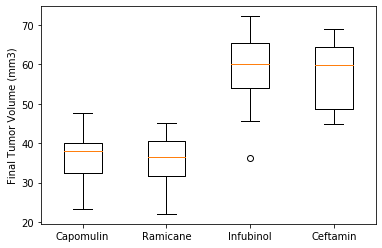

In [248]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
CapVolumes = Capomulin_volume['Tumor Volume (mm3)']
RamVolumes = Ramicane_volume['Tumor Volume (mm3)']
InfVolumes = Infubinol_volume['Tumor Volume (mm3)']
CefVolumes = Ceftamin_volume['Tumor Volume (mm3)']
data_to_plot = [CapVolumes, RamVolumes, InfVolumes, CefVolumes]
x = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
#fig2, ax2 = plt.subplots()
ax1.boxplot(data_to_plot)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(x)
# ax2.boxplot(RamVolumes)
# ax3.boxplot(InfVolumes)
# ax4.boxplot(CefVolumes)
plt.show()


## Line and Scatter Plots

In [250]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_mousedata_df.loc[(combined_mousedata_df["Drug Regimen"] == "Capomulin")]
s185_df = Capomulin_df.loc[(Capomulin_df["Mouse ID"] == "s185")]
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


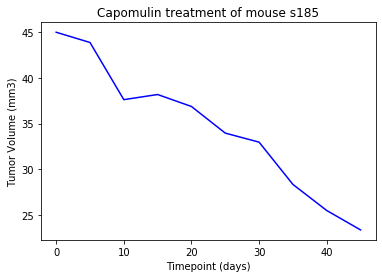

In [253]:
Time = s185_df["Timepoint"]
Volume = s185_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
Capomulin, = plt.plot(Time, Volume, color="blue", label="Capomulin treatment of mouse s185")
plt.show()

In [254]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin 
#regimen
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [273]:
weight_df = Capomulin_df.groupby(["Mouse ID", "Weight (g)"])['Tumor Volume (mm3)'].mean().reset_index()

weight_df.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


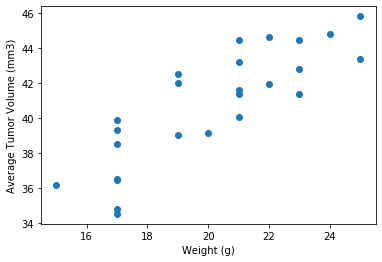

In [280]:
plt.scatter(weight_df['Weight (g)'],weight_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [275]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight_df['Weight (g)'],weight_df['Tumor Volume (mm3)'])[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


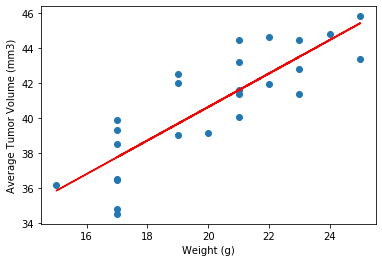

In [311]:
plt.scatter(weight_df['Weight (g)'],weight_df['Tumor Volume (mm3)'])
x_values = weight_df['Weight (g)']
y_values = weight_df['Tumor Volume (mm3)']
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r")
plt.show()